In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_1429=pd.read_csv('/content/drive/My Drive/Capstone Project/Amazon_Dataset/Basic_Analysis/Amazon_Basic_EDA_02.csv')
df_1429.head(2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0  ... reviews.username
0           0  ...       Byger yang
1           1  ...             ByMG

[2 rows x 11 columns]

In [ ]:
df_1429.shape

(67992, 11)

In [ ]:
df=df_1429[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (67992, 4)


name  ... reviews.numHelpful
0  AmazonBasics AAA Performance Alkaline Batterie...  ...                NaN
1  AmazonBasics AAA Performance Alkaline Batterie...  ...                NaN
2  AmazonBasics AAA Performance Alkaline Batterie...  ...                NaN
3  AmazonBasics AAA Performance Alkaline Batterie...  ...                NaN
4  AmazonBasics AAA Performance Alkaline Batterie...  ...                NaN

[5 rows x 4 columns]

In [ ]:
df.isnull().sum()

name                    6760
reviews.text               1
reviews.doRecommend    12840
reviews.numHelpful     12746
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

In [ ]:
df.shape

(48495, 4)

In [ ]:
df=df.groupby('name').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of products=>',len(df['name'].unique()))

Number of products=> 21


In [ ]:
df.groupby('name').count()

reviews.text  ...  reviews.numHelpful
name                                                              ...                    
All-New Fire HD 8 Tablet with Alexa, 8 HD Displ...           883  ...                 883
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...          2370  ...                2370
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...          2814  ...                2814
All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi,...           797  ...                 797
Amazon - Echo Plus w/ Built-In Hub - Silver                  590  ...                 590
Amazon Echo Show Alexa-enabled Bluetooth Speake...           845  ...                 845
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                      2527  ...                2527
Amazon Kindle Paperwhite - eBook reader - 4 GB ...          3176  ...                3176
Amazon Tap Smart Assistant Alexaenabled (black)...           595  ...                 595
Brand New Amazon Kindle Fire 16gb 7 Ips Display...          1030  ...                1030
Echo (White),,,\r\nEcho (White),,,                          3300  ...                3300
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 G...          2443  ...                2443
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...          1986  ...                1986
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...          3108  ...                3108
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...          1676  ...                1676
Fire Tablet with Alexa, 7 Display, 16 GB, Blue ...           987  ...                 987
Fire Tablet with Alexa, 7 Display, 16 GB, Magen...           745  ...                 745
Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes...          1395  ...                1395
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes ...         10962  ...               10962
Kindle Voyage E-reader, 6 High-Resolution Displ...           505  ...                 505
Kindle Voyage E-reader, 6 High-Resolution Displ...           580  ...                 580

[21 rows x 3 columns]

In [ ]:
df['reviews.doRecommend']=df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful']=df['reviews.numHelpful'].astype(int)

In [ ]:
df['name'].unique()

array(['Amazon Tap Smart Assistant Alexaenabled (black) Brand New',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
       'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers',
       'Fire Tablet with Alexa, 7 Display, 16 GB, Magenta - with Special Offers',
       'Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers',
      

In [ ]:
df['name']=df['name'].apply(lambda x: x.split(',,,')[0])

In [ ]:
df['name']=df['name'].apply(lambda x: x.rstrip(','))

In [ ]:
df['name']=df['name'].replace('"','',regex=True)

In [ ]:
df['name'].unique()

array(['Amazon Tap Smart Assistant Alexaenabled (black) Brand New',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
       'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers',
       'Fire Tablet with Alexa, 7 Display, 16 GB, Magenta - with Special Offers',
       'Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers',
      

In [ ]:
df['name'].nunique()

19

In [ ]:
df.groupby('name').count()

reviews.text  ...  reviews.numHelpful
name                                                              ...                    
All-New Fire HD 8 Tablet with Alexa, 8 HD Displ...           883  ...                 883
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...          2370  ...                2370
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...          3611  ...                3611
Amazon - Echo Plus w/ Built-In Hub - Silver                  590  ...                 590
Amazon Echo Show Alexa-enabled Bluetooth Speake...           845  ...                 845
Amazon Fire Tv                                              2527  ...                2527
Amazon Kindle Paperwhite - eBook reader - 4 GB ...          3176  ...                3176
Amazon Tap Smart Assistant Alexaenabled (black)...           595  ...                 595
Brand New Amazon Kindle Fire 16gb 7 Ips Display...          1030  ...                1030
Echo (White)                                                3300  ...                3300
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 G...          2443  ...                2443
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...          1986  ...                1986
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...          3108  ...                3108
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...          1676  ...                1676
Fire Tablet with Alexa, 7 Display, 16 GB, Blue ...           987  ...                 987
Fire Tablet with Alexa, 7 Display, 16 GB, Magen...           745  ...                 745
Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes...          1395  ...                1395
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes ...         10962  ...               10962
Kindle Voyage E-reader, 6 High-Resolution Displ...          1085  ...                1085

[19 rows x 3 columns]

In [ ]:
for index,text in enumerate(df['reviews.text'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 This is my second Echo purchase. My first was the original Echo for my home and the automation feature aside. The sound is excellent, Alexa's response is better than any digital assistant to date, and the ready access to Prime is convenient. This is all of that and portable and rechargeable as well. Additionally the inclusion of Bluetooth and a headphone jack is amazing.
Review 2:
 Always loved the Amazon Echo. Now we can rake it with us, outside, wherever!
Review 3:
 I really like the sound of the tab. The only complaint is that you have to push the button every time you have to speak or listen to tab. Unlike the echo, where you just speak and it answers without pushing any buttons. The echo has a cheaper sounding speaker. I'd wait till there is a sale in it before paying full price. Otherwise, it is just like a Bluetooth speaker.
Review 4:
 Amazon Tap is exactly what I expected it would be. The sound quality is good with the Alexa features. I love that you can charge it on

In [ ]:
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviews.text']=df['reviews.text'].apply(lambda x:expand_contractions(x))

In [ ]:
result = re.match(r'AV', 'AV Analytics Vidhya AV')
print ('\n',result)


 <_sre.SRE_Match object; span=(0, 2), match='AV'>


In [ ]:
result = re.match(r'AV', 'AV Analytics Vidhya AV')
print ('\nMatching string :',result.group(0))


Matching string : AV


In [ ]:
df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [ ]:
# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
from textblob import TextBlob
df['cleaned'] = df['cleaned'].apply(lambda txt: ''.join(TextBlob(txt).correct()))

In [ ]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_text(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [ ]:
pattern = r'[^a-zA-z0-9\s]'
df['cleaned']=df['cleaned'].apply(lambda x:re.sub(pattern,'',x))

In [ ]:
for index,text in enumerate(df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 this is my second echo purchase my first was the original echo for my home and the automatic feature aside the sound is excellent area is response is better than any digital assistant to date and the ready access to prime is convenient this is all of that and portable and rechargeable as well additional the inclusion of bluetooth and a headphone jack is amazing 
Review 2:
 always loved the amazon echo now we can rake it with us outside wherever 
Review 3:
 i really like the sound of the tax the only complaint is that you have to push the button every time you have to speak or listen to tax unlike the echo where you just speak and it answers without pushing any buttons the echo has a cheaper sounding speaker i would wait till there is a sale in it before paying full price otherwise it is just like a bluetooth speaker 
Review 4:
 amazon tap is exactly what i expected it would be the sound quality is good with the area features i love that you can charge it on the base or with 

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
df_grouped=df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head(5)

lemmatized
name                                                                                                 
All-New Fire HD 8 Tablet with Alexa, 8 HD Displ...  tablet offer fun expect good product great pri...
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  ape miss goose play store list minimal tablet ...
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  buy replace old kindle keypad experimental int...
Amazon - Echo Plus w/ Built-In Hub - Silver         works great turn h light area ape special ligh...
Amazon Echo Show Alexa-enabled Bluetooth Speake...  great gift easy set coexist device area awesom...

In [ ]:
df_grouped['lemmatized'].replace({'kiss':'kids','abc':'','ac':'','yeeeeaaaahhhhh':'','yearsand':'','yea':'','yer':'',
                                  'wry':'','www':'','xx':'','xxx':'','xxxi':'','xi':'','yuma':'','granddaughter':'','addedand':''},regex=True,inplace=True)

In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

abandon  ability  ...  zip  zone
name                                                                  ...           
All-New Fire HD 8 Tablet with Alexa, 8 HD Displ...        0        7  ...    0     1
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...        0       18  ...    0     0
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...        0       34  ...    0     0

[3 rows x 7020 columns]

In [ ]:
df_dtm.shape

(7058, 19)

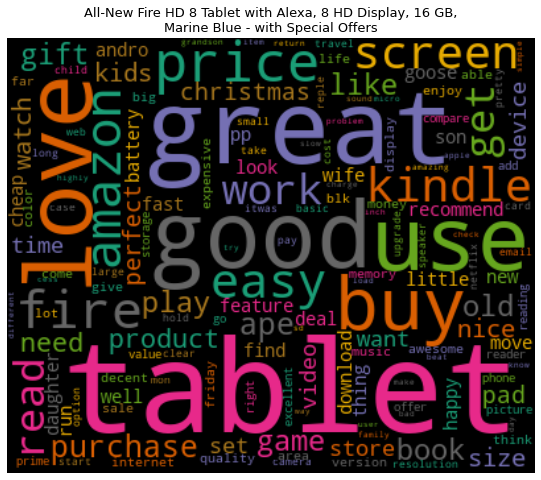

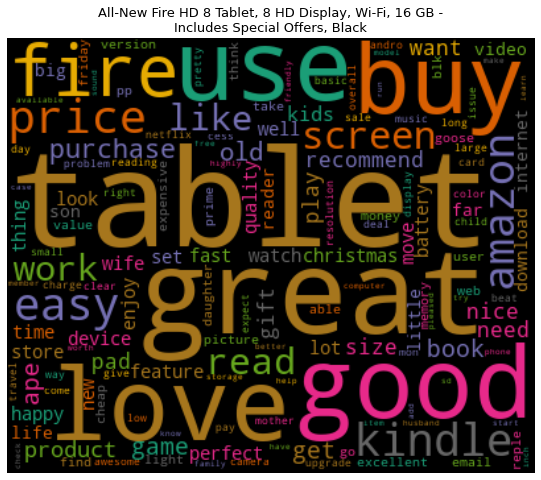

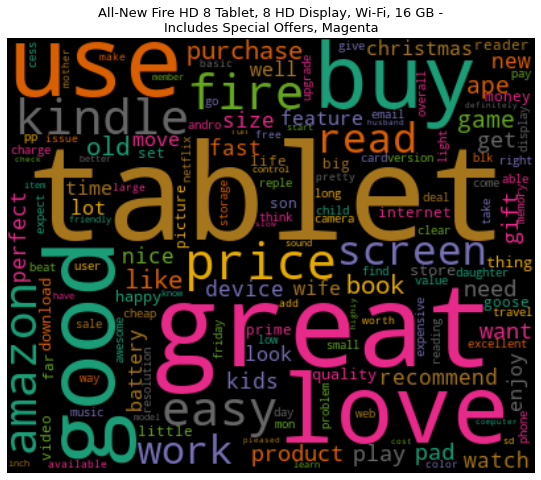

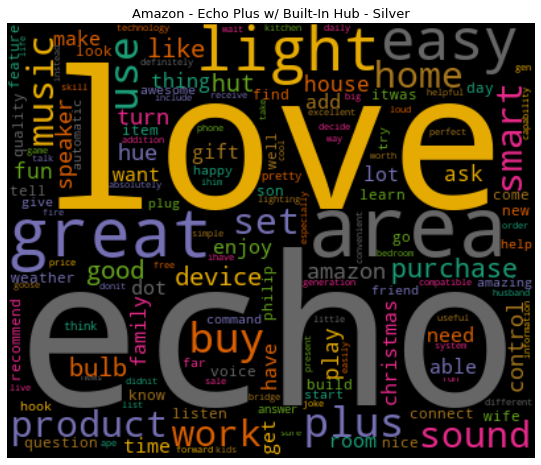

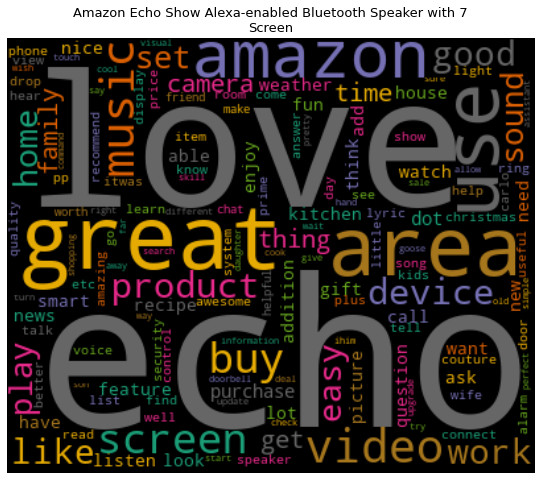

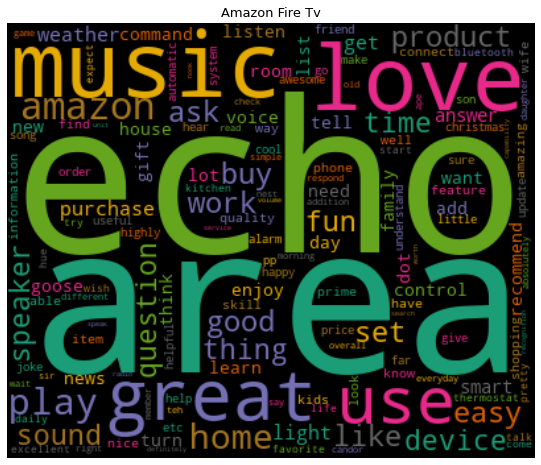

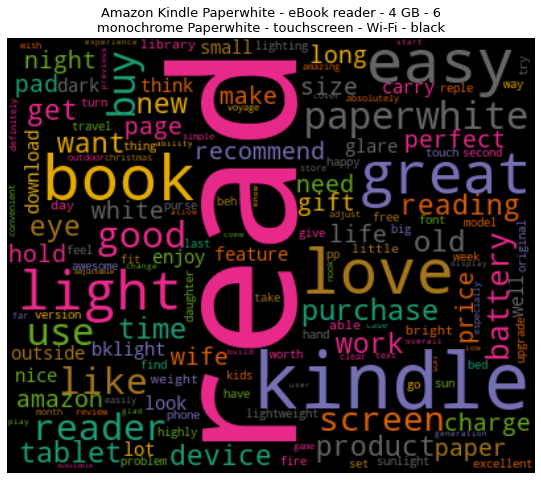

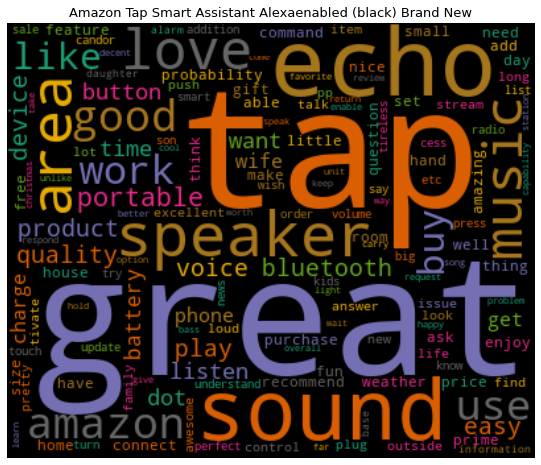

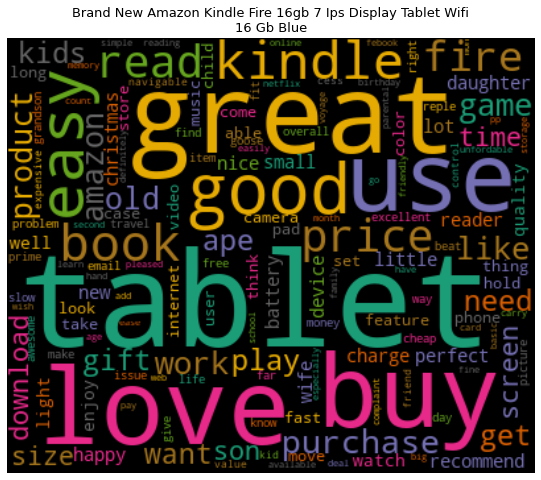

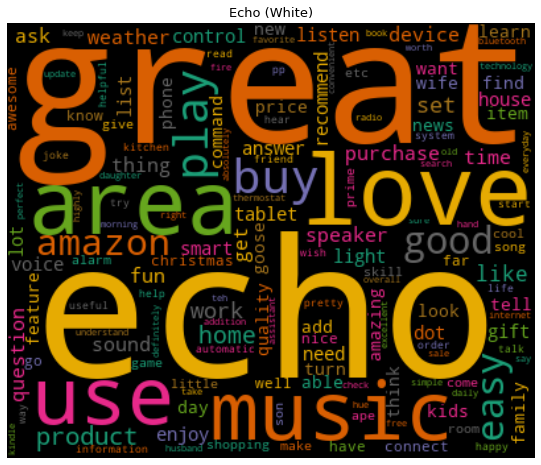

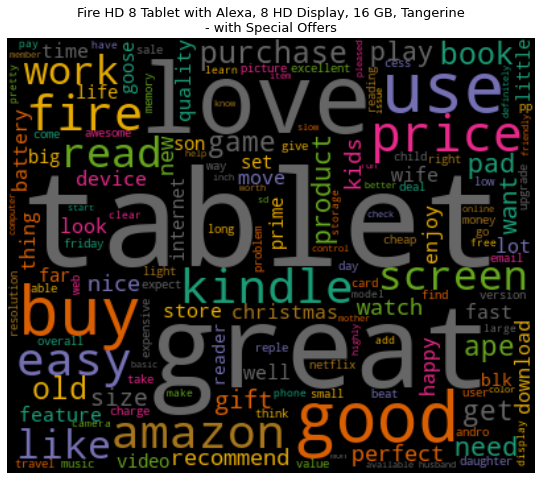

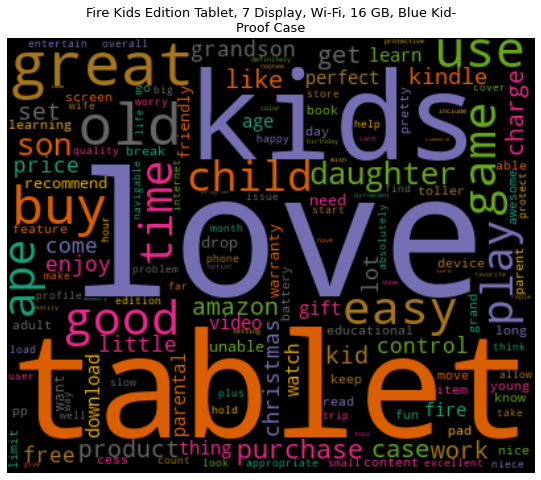

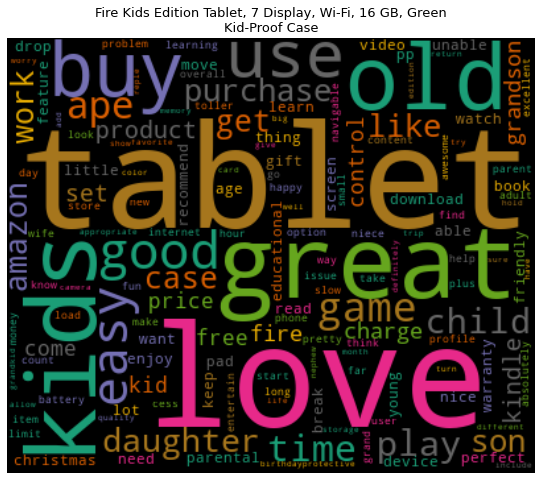

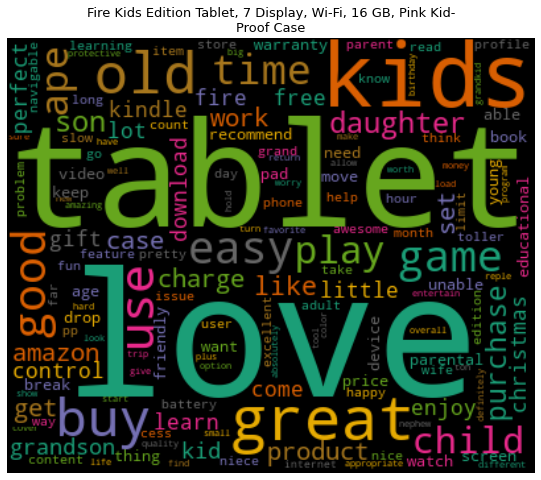

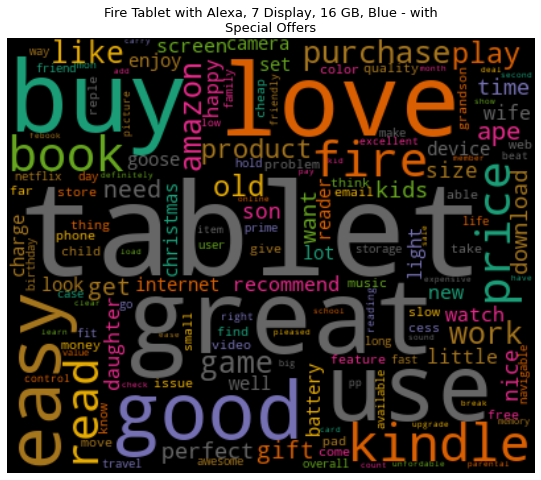

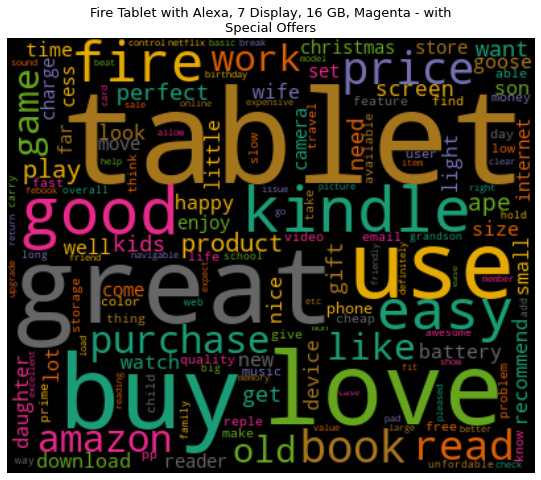

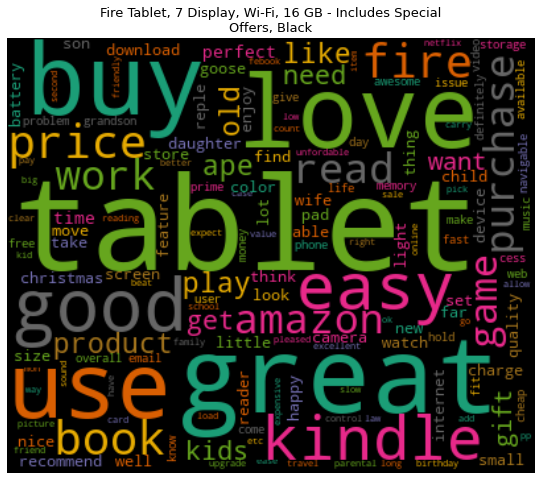

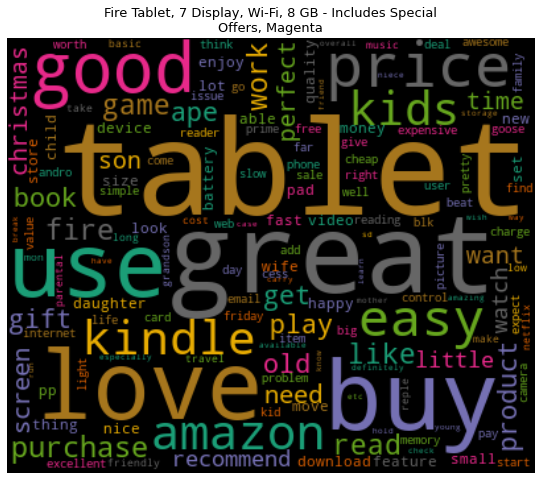

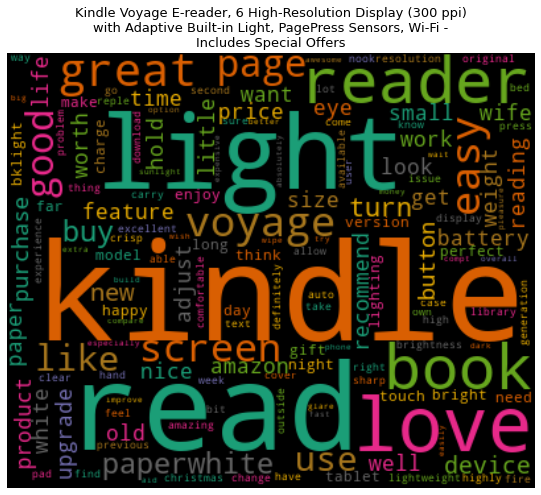

In [ ]:
import matplotlib.pyplot as plt
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [ ]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 This was a perfect gift for the holidays! I saw the reviews on this and immediately had to get it!
Review 2:
 I prefer apple products myself. But this is perfect for children
Review 3:
 Excellent for reading and can be used as a tablet for Internet use.


In [ ]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

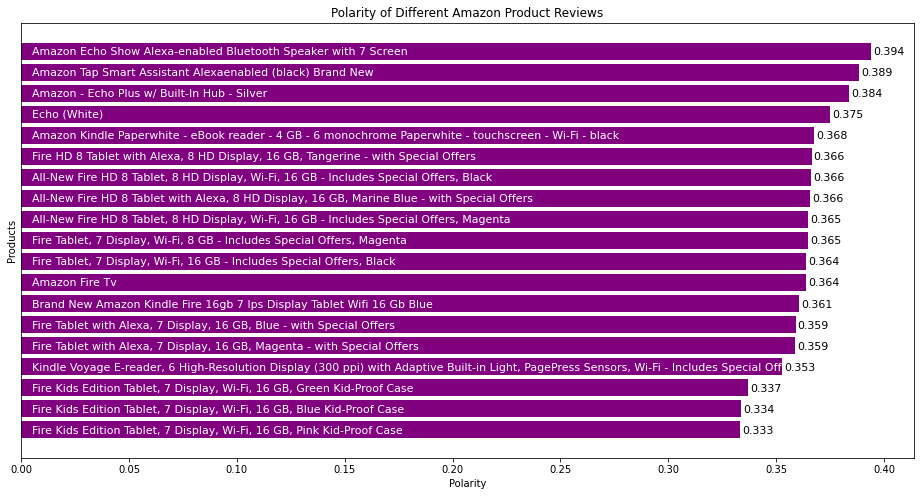

In [ ]:
import numpy as np
product_polarity_sorted=pd.DataFrame(df.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
plt.yticks([])
plt.show()

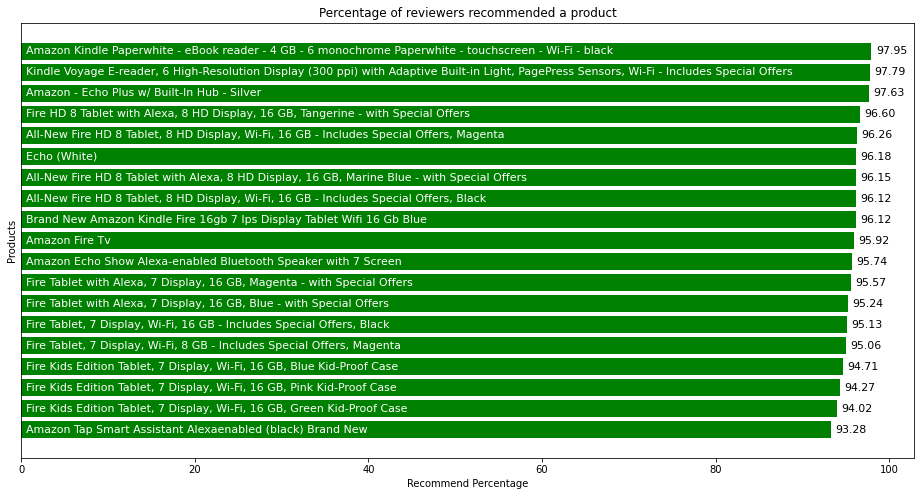

In [ ]:
recommend_percentage=pd.DataFrame(((df.groupby('name')['reviews.doRecommend'].sum()*100)/df.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['reviews.doRecommend'],color='green')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()